# PyTorch Computer Vision

- See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
- See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

# 0. Computer Vision libraries in PyTorch

- `torchvision` - base domain library for PyTorch computer vision
- `torchvision.datasets` - get datasets and data loading functions for computer vision here
- `torchvision.models` - get pretrained cv models that you can leverage for your own problems
- `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
- `torch.utils.data.Datase` Base dataset class for PyTorch
- `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

# 1. Import PyTorch

In [1]:
from time import process_time_ns
from typing import re

import torch
from pandas.core.interchange.from_dataframe import primitive_column_to_ndarray
from sympy import print_rcode
from torch import nn
import torchvision
from torchgen.api.types import deviceT
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1. Getting a dataset
The dataset will be using is Fashion MNIST from torchvision.datasets - https://docs.pytorch.org/vision/0.17/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST



In [3]:
!nvidia-smi

Fri Jun 27 14:38:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.153.02             Driver Version: 570.153.02     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              9W /   35W |      55MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# setup training data
from torchvision.datasets import FashionMNIST

train_data = FashionMNIST(
    root="../FashionMNIST_dataset/train", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the target?
)

test_data = FashionMNIST(
    root="../FashionMNIST_dataset/test",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# see the first training example
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
print(f"Image shape is {image.shape} -> [color_channels, height, width]")
print(f"Image label is {label} -> [{class_names[label]}]")

Image shape is torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label is 9 -> [Ankle boot]


## 1.2 visualizing our data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

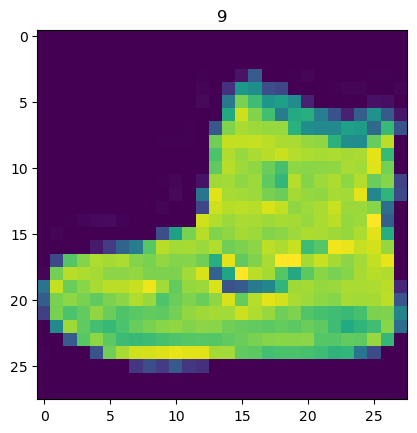

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
# image
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

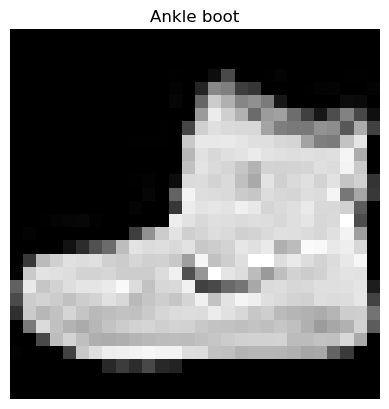

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
# plt.axis("off")
plt.axis(False)

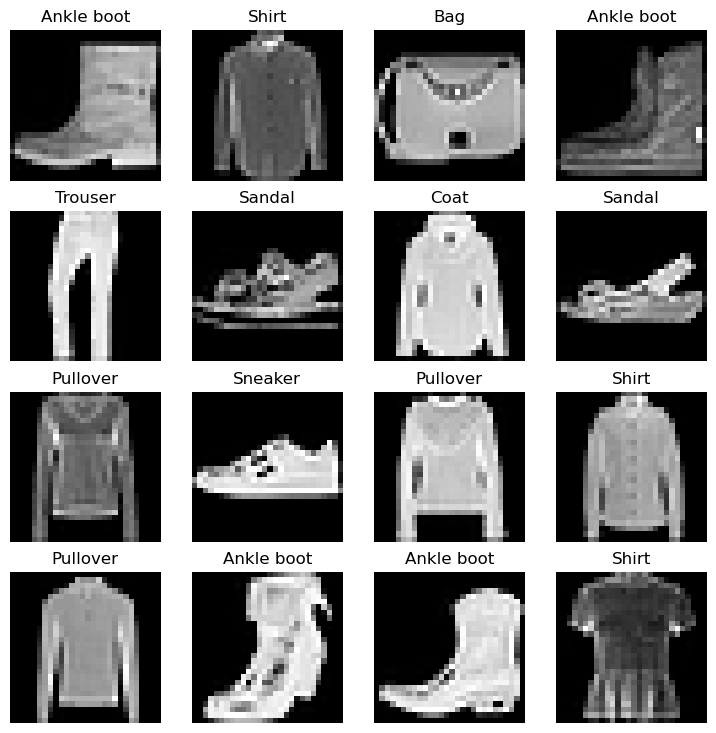

In [13]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. prepare DataLoader

right now, our data is in the form of PyTorch Datasets

DataLoader turns dataset into python iterable

More specifically, we want to turn our data into batches (or mini batches)

Why would we do this?
1. more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 6000 images in one hit. so we break it down into smaller batches like 32 images at a time. (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch
3.

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ../FashionMNIST_dataset/train
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ../FashionMNIST_dataset/test
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
from torch.utils.data import DataLoader

# set up the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterable batches
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [16]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f3337454ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3337457580>)

In [17]:
# let's check out of what we have created
print(f"Dataloaders : {train_loader, test_loader}")
print(f"Length of train_loader : {len(train_loader)} batches of size {BATCH_SIZE}" )
print(f"Length of test_loader : {len(test_loader)} batches of size {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f3337454ac0>, <torch.utils.data.dataloader.DataLoader object at 0x7f3337457580>)
Length of train_loader : 1875 batches of size 32
Length of test_loader : 313 batches of size 32


In [18]:
# check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 6, label size : torch.Size([])


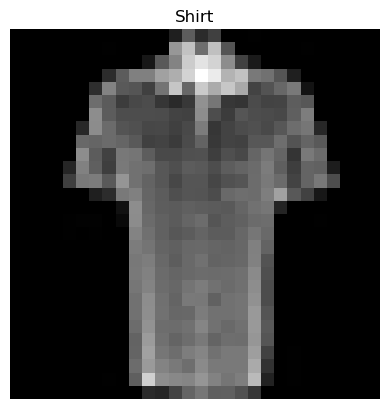

In [19]:
# show a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")

## 3.0 Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

in other words : start simply and add complexity when necessary

In [20]:
# creating a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]


# flatten the sample
output = flatten_model(x) # perform forward pass

# print out what happened
print(f"Shape before flattening : {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening : {output.shape} -> [color_channels, height * width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels, height * width]


In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [22]:
device = "gpu" if torch.cuda.is_available() else "cpu"
print(device)

gpu


In [23]:
torch.manual_seed(42)

# set up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1 ,1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss, optimizer, and eval metrics

* loss function - sinec we're working with multi-class data, out loss function will be `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD()` (Stochastic grad des)
* Eval metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [26]:
import requests

from pathlib import Path

# Download helper functions from learn PyTorch repo
if Path("../Python/helper_functions.py").is_file():
    print("The py file exists")
else:
    print("Downloading the py file")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    r = requests.get(url)
    with open("../Python/helper_functions.py", "wb") as f:
        f.write(r.content)

The py file exists


In [27]:
# import the accuracy metrics

from PyTorchLearnings_UDEMY.Python.helper_functions import accuracy_fn

# setup loss func and opt
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is experimental

Two of main things you'll often want to track here:
1) Model's performance (loss and accuracy values etc)
2) Time taken to train the model

In [28]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device=None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

In [29]:
start_timer = timer()
# some code..
end_timer = timer()
print_train_time(start_timer, end_timer, "cpu")


Train time on cpu: 0.000 seconds


1.5508999922531075e-05

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training bacthes, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the tes loss *per batch*
4. Print out what is happening
5. Time it all

In [30]:
# import tqdm for progresss bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set number of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # trainign
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_loader):
        model_0.train()
        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # print out what is happeling
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_loader.dataset)} samples")

    # divide total train loss by length of train dataloader
    train_loss /= len(train_loader)

    ### testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_loader:
            test_pred = model_0(X_test)

            #2. calc the loss
            test_loss += loss_fn(test_pred, y_test)

            # calc acc
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # calc the test loss avg per batch
        test_loss /= len(test_loader)

        # calc the test acc avg per batch
        test_acc /= len(test_loader)

    # print out what is happening
    print(f"\n Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test accuracy : {test_acc:.4f}")

# calc the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


/home/diyrad167/.conda/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:07<00:14,  7.13s/it]


 Train loss : 0.5904 | Test loss : 0.5102 | Test accuracy : 82.0387
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:13<00:06,  6.83s/it]


 Train loss : 0.4743 | Test loss : 0.5268 | Test accuracy : 81.6793
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:20<00:00,  6.75s/it]


 Train loss : 0.4537 | Test loss : 0.5126 | Test accuracy : 82.9972

Train time on cpu: 20.265 seconds


In [31]:
str(next(model_0.parameters()).device)

'cpu'

In [32]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0071,  ...,  0.0009,  0.0065,  0.0173],
        [-0.0189, -0.0356,  0.0156,  ...,  0.0196,  0.0118,  0.0108],
        [-0.0008,  0.0019,  0.0030,  ...,  0.0143, -0.0122,  0.0079],
        ...,
        [-0.0115,  0.0274, -0.0323,  ...,  0.0507,  0.0457,  0.0008],
        [-0.0231,  0.0251,  0.0240,  ..., -0.0838, -0.0380, -0.0074],
        [ 0.0175, -0.0149,  0.0031,  ..., -0.1092, -0.0676,  0.0112]],
       requires_grad=True)

## 4. make predictions and get model 0 results

In [33]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # scale loss and acc to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model name ": model.__class__.__name__, # Only works when model was created with a class
            "model loss ": loss.item(),
            "model acc ": acc
            }
# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_loader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 441.19it/s]


{'model name ': 'FashionMNISTModelV0',
 'model loss ': 0.5125296711921692,
 'model acc ': 83.00718849840256}

## 5. setup device agonostic code (for using GPU if there is one)

In [34]:
# setup right herre
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
# create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten input into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [36]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=784, # output of the flatten layer after our 28 * 28 image goes in
    hidden_units=10,
    output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [37]:
from PyTorchLearnings_UDEMY.Python import helper_functions

loss_fn = nn.CrossEntropyLoss() # measure how wrong is our model is
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1) # tries to update our model's parameters to reduce the loss


### 6.2 Functionizing training and evaluaton/test loops

Let's create a function for:
- training loop - `train_step()`
- testing loop - `test_step()`

In [38]:
# def train_step(model: torch.nn.Module,
#                 data_loader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                accuracy_fn,
#                device: torch.device=device):
#     """performs a training with model trying to learn on data_loader"""
#     train_loss, train_acc= 0,  0
#
#     # put model into training mode
#     model.to(device)
#
#     for batch, (X, y) in enumerate(data_loader):
#         # put data on target device
#         X, y = X.to(device), y.to(device)
#         # 1. forward pass
#         y_pred = model(X)
#
#         # 2. calculate loss and acc (per batch)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss # accumulate train loss
#         train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits to pred labels
#
#         # 3. optimizer zero grad
#         optimizer.zero_grad()
#
#         # 4. Loss backward
#         loss.backward()
#
#         # 5. optimizer step
#         optimizer.step()
#
#         # print out what is happeling
#         if batch % 400 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_loader.dataset)} samples")
#
#     # divide total train loss and acc by length of train dataloader
#     train_loss /= len(data_loader)
#     train_acc /= len(data_loader)
#     print(f"Train loss : {train_loss:.4f} | Train accuracy : {train_acc:.2f}%")

In [39]:
# def test_step(model: torch.nn.Module,
#               data_loader: torch.utils.data.DataLoader,
#               loss_fn: torch.nn.Module,
#               accuracy_fn,
#               device: torch.device=device):
#     """performs a testing with model trying to learn on data_loader"""
#     test_loss, test_acc = 0, 0
#
#     # put the model in eval mode
#     model.to(device)
#     model.eval()
#
#     # turn on inference mode context manager
#     with torch.inference_mode():
#         for X, y in data_loader:
#             # send the data to the target device
#             X, y = X.to(device), y.to(device)
#
#             # 1. forward pass
#             test_pred = model(X)
#
#             # calc the loss/acc
#             test_loss += loss_fn(test_pred, y)
#             test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # go from logits to pred labels
#
#         # adjust the metrics and print out
#         test_loss /= len(data_loader)
#         test_acc /= len(data_loader)
#         print(f"Test loss : {test_loss:.4f} | Test accuracy : {test_acc:.2f}%\n")


In [40]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [41]:
torch.manual_seed(42)

# meassure the time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create an optimizaton and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    print(f"Epoch {epoch}\n---------")
    test_step(model = model_1,
              data_loader=test_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Epoch 0
---------


 33%|███▎      | 1/3 [00:06<00:13,  6.93s/it]

Test loss: 0.95690 | Test accuracy: 64.98%

Epoch 1
---------
Train loss: 0.73779 | Train accuracy: 73.69%
Epoch 1
---------


 67%|██████▋   | 2/3 [00:13<00:06,  6.88s/it]

Test loss: 0.72388 | Test accuracy: 74.21%

Epoch 2
---------
Train loss: 0.66776 | Train accuracy: 76.08%
Epoch 2
---------


100%|██████████| 3/3 [00:24<00:00,  8.27s/it]

Test loss: 0.68751 | Test accuracy: 75.64%


Train time on cuda:0: 24.798 seconds


In [42]:
model_0_results

{'model name ': 'FashionMNISTModelV0',
 'model loss ': 0.5125296711921692,
 'model acc ': 83.00718849840256}

In [43]:
total_train_time_model_0

20.26531403399997

> **Note** : The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer
> **Question** : "I used a GPU but my model didn't train faster, why might that be?"
> **Answer** : Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.

> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.

>So for smaller models and datasets, the CPU might actually be the optimal place to compute on.

> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.

> However, this is largely dependent on the hardware you're using. With practice, you will get used to where the best place to train your models is.

In [44]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # scale loss and acc to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model name ": model.__class__.__name__, # Only works when model was created with a class
            "model loss ": loss.item(),
            "model acc ": acc
            }

In [45]:
# get model_1 results dict
model_1_results = eval_model(model=model_1,
                             data_loader=test_loader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 439.56it/s]


{'model name ': 'FashionMNISTModelV1',
 'model loss ': 0.687465250492096,
 'model acc ': 75.64896166134186}

In [46]:
model_0_results

{'model name ': 'FashionMNISTModelV0',
 'model loss ': 0.5125296711921692,
 'model acc ': 83.00718849840256}

https://poloclub.github.io/cnn-explainer/##

## Model 2 : Build a CNN

CCN's are also known ConvNets

CNN's are known for their capabilities to find patterns in visual data

In [107]:
# create a CNN
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the tinyVGG
    model from CNN explainer website
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # create a conv block = https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculate this
                      out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv block 1 : {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv block 2 : {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier : {x.shape}")
        return x

In [108]:
len(class_names)

10

In [109]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

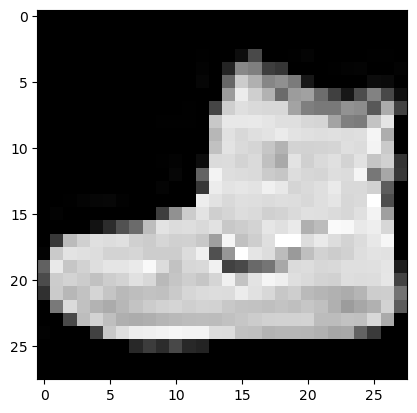

In [110]:
plt.imshow(image.squeeze(), cmap="grey")

In [111]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [112]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [113]:
output_dt = print(model_2(rand_image_tensor.unsqueeze(0).to(device)))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [114]:
image.shape

torch.Size([1, 28, 28])

### 7.1 Stepping through `conv2d`

documentation : https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [115]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shaep : {test_image.shape}")
print(f"Test image :\n {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shaep : torch.Size([3, 64, 64])
Test image :
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [

In [116]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # Number of channels in the input shape
                       out_channels=10, # Number of channels produced by the convolution
                       kernel_size=5, # size of the convolving kernel
                       padding=1, # Padding added to all four sides of the input
                       stride=1) # stride of the convolution

# pass the data through the conv layer
conv_output = conv_layer(test_image)

In [117]:
conv_output.shape

torch.Size([10, 62, 62])

In [118]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [119]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

### 7.2 stepping through `nn.MaxPool2d()`

docs : https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html


In [120]:
# print out original shape without unsqueezed dimension
print(f"Test image original shape : {test_image.shape}")
print(f"Test image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after conv_layer : {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_after_maxp_conv = max_pool_layer(test_image_through_conv)
print(f"Shape after max_pool_layer and conv_layer : {test_image_after_maxp_conv.shape}")

Test image original shape : torch.Size([3, 64, 64])
Test image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
Shape after conv_layer : torch.Size([1, 10, 62, 62])
Shape after max_pool_layer and conv_layer : torch.Size([1, 10, 31, 31])


In [121]:
torch.manual_seed(42)

# create a random tensor with a similar number of dims
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\n Random tensor: \n {random_tensor}")
print(f"Random tensor shape : {random_tensor.shape} ")
# create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape : {max_pool_tensor.shape}")





 Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape : torch.Size([1, 1, 2, 2]) 

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape : torch.Size([1, 1, 1, 1])


## 7.3 Set up a loss func and opt for `model_2`

In [122]:
# setup loss func.eval metrics/opt
from PyTorchLearnings_UDEMY.Python.helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

### 4.4 training and testing `model 2` using our traininf and test func

In [129]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# meassure the time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create an optimizaton and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    print(f"Epoch {epoch}\n---------")
    test_step(model = model_2,
              data_loader=test_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 0.41462 | Train accuracy: 85.04%
Epoch 0
---------


 33%|███▎      | 1/3 [00:07<00:15,  7.77s/it]

Test loss: 0.41173 | Test accuracy: 85.60%

Epoch 1
---------
Train loss: 0.38689 | Train accuracy: 86.12%
Epoch 1
---------


 67%|██████▋   | 2/3 [00:15<00:07,  7.52s/it]

Test loss: 0.41604 | Test accuracy: 85.17%

Epoch 2
---------
Train loss: 0.36622 | Train accuracy: 86.92%
Epoch 2
---------


100%|██████████| 3/3 [00:22<00:00,  7.48s/it]

Test loss: 0.38799 | Test accuracy: 86.50%


Train time on cuda:0: 22.436 seconds


In [131]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
    # device=device
)

model_2_results

100%|██████████| 313/313 [00:00<00:00, 363.65it/s]


{'model name ': 'FashionMNISTModelV2',
 'model loss ': 0.3875398635864258,
 'model acc ': 86.51158146964856}

In [132]:
model_1_results

{'model name ': 'FashionMNISTModelV1',
 'model loss ': 0.687465250492096,
 'model acc ': 75.64896166134186}

In [133]:
model_0_results

{'model name ': 'FashionMNISTModelV0',
 'model loss ': 0.5125296711921692,
 'model acc ': 83.00718849840256}

## 8. Compare model results and training time

In [142]:
import pandas as pd

comparison = pd.DataFrame([model_0_results, model_1_results, model_2_results])
comparison

,model name,model loss,model acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.687465,75.648962
2,FashionMNISTModelV2,0.387540,86.511581


In [143]:
# add training time to results comparison
comparison["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

comparison

,model name,model loss,model acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,20.265314
1,FashionMNISTModelV1,0.687465,75.648962,23.509808
2,FashionMNISTModelV2,0.387540,86.511581,22.435545


In [146]:
list(comparison)

['model name ', 'model loss ', 'model acc ', 'training_time']

(array([0, 1, 2]),
 [Text(0, 0, 'FashionMNISTModelV0'),
  Text(1, 0, 'FashionMNISTModelV1'),
  Text(2, 0, 'FashionMNISTModelV2')])

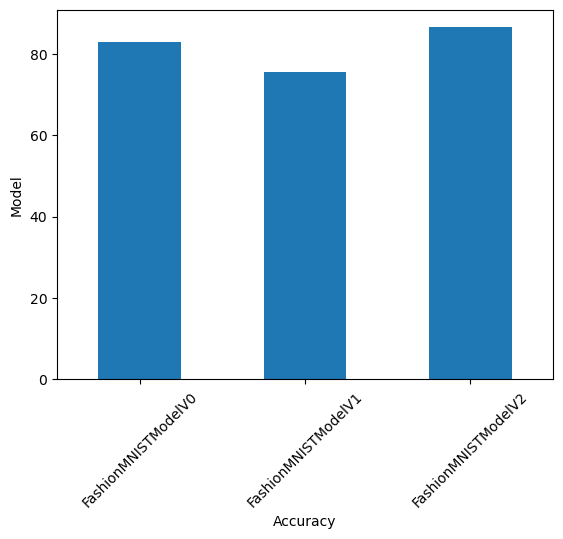

In [149]:
# visualize our model results

comparison.set_index("model name ")["model acc "].plot(kind="bar")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xticks(rotation=45)